# Predicting Song Genre from Song Lyrics

### EDA of dataset

With exploratory data analysis in particular, the goal was to familiarize myself with the data which may include what kinds of artists were predominant, idiosyncrasies with the lyrics, and what features made a particular genre.

The goal of the project was, as said in title, to predict genre based on the lyrics. In order to tackle this problem, this involved EDA in order to know what I was getting into. 

In [3]:
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score
import seaborn as sns
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [4]:
import nltk
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Manda\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Manda\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Manda\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Manda\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### This is the data from the "dataprep" process in Part1

In [5]:
df2 = pd.read_csv('lyrics_final.csv', delimiter=',')

<Figure size 800x640 with 0 Axes>

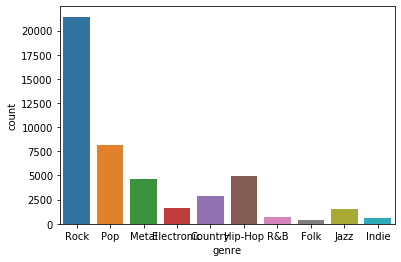

<Figure size 800x640 with 0 Axes>

In [17]:
sns.countplot(df2['genre']);


In [7]:
def times(c):
    if 1950 <= c and c < 1960:
        return 1950
    elif 1960 <= c and c < 1970:
        return 1960
    if 1970 <= c and c < 1980:
        return 1970
    elif 1980 <= c and c < 1990:
        return 1980
    elif 1990 <= c and c < 2000:
        return 1990
    elif 2000 <= c and c < 2010:
        return 2000
    elif 2010 <= c and c < 2020:
        return 2010
    return -1

df2['year'] = df2['year'].apply(int, 1)
df2['times'] = df2['year'].apply(times)
df2.head()

,Unnamed: 0,song,year,artist,genre,lyrics,lyrics_final,lyrics_noun,times
0,0,urethane,2006,fu-manchu,Rock,"['like', 'so', 'with', 'gasoline', 'on', 'more...","['like', 'gasoline', 'ever', 'go', 'back', 'an...","['gasoline', 'day', 'road', 'mola', 'line', 'f...",2000
1,1,impossible,2006,eurythmics,Pop,"['i', ""'ve"", 'got', 'a', 'habits', 'i', 'know'...","['get', 'habit', 'know', 'pick', 'fault', 'fak...","['habit', 'fault', 'lot', 'friend', 'people', ...",2000
2,2,ir-saula-neteko-savo-pusa-s-veido,2007,anubi,Metal,"['[', 'instrumental', ']']",['instrumental'],[],2000
3,3,i-m-so-glad,2006,gabrielle,Pop,"['i', 'can', 'never', 'be', 'sure', 'why', 'yo...","['never', 'sure', 'make', 'feel', 'way', 'dang...","['way', 'excitement', 'people', 'life', 'share...",2000
4,4,it-doesn-t-matter-two,2014,depeche-mode,Pop,"['as', 'i', 'lay', 'here', 'with', 'you', 'the...","['lay', 'shame', 'lie', 'u', 'talk', 'love', '...","['shame', 'love', 'trust', 'world', 'pioneer',...",2010


Text(0.5, 0, 'Number of Songs by Decade')

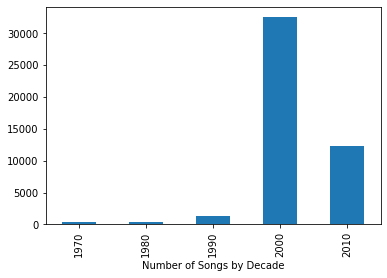

In [10]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

times1 = df2['times'] == '2000'
times1
df2.groupby(['times']).aggregate({
    'times' : 'count'
}).sort_index(ascending=True)['times'].plot.bar()
plt.xlabel('Number of Songs by Decade')

In [11]:
from numpy import mean
from numpy import std
from numpy.random import randn
from numpy.random import seed
from matplotlib import pyplot
# seed random number generator

In [14]:
#lyrics by genre
def textgenre(s):
    lyrics=""
    for ind,val in df2.iterrows():
        if val["genre"]==s:
            lyrics = lyrics + str(val["lyrics_noun"])
    return lyrics

In [15]:
lyricsr = textgenre('Rock')
lyricsc = textgenre('Country')
lyricsp = textgenre('Pop')
lyricsh = textgenre('Hip-Hop')
lyricsm = textgenre('Metal')

customStopWords = ["'s", "n't", "'m", "'re", "'ll","'ve","...", "ä±", "''", '``',\
                  '--', "'d", 'el', 'la', 'chorus', 'verse', 'oh', 'la', 'ya', 'na', 'wo', 'wan', 'Chorus', 'Verse',
                  'ca', 'cuz', '[Verse 1:]', '[Intro:]', '[Chorus]', '\n', 's', 't', 'n', 'don',
                  'ya','aah','ye','hey','ba','da','buh','duh','doo','oh','ooh','woo','uh','hoo','ah','yeah',
                   'oo','la','chorus','beep','ha', "get'", "like'"]

stopWords = stopwords.words('english') + customStopWords

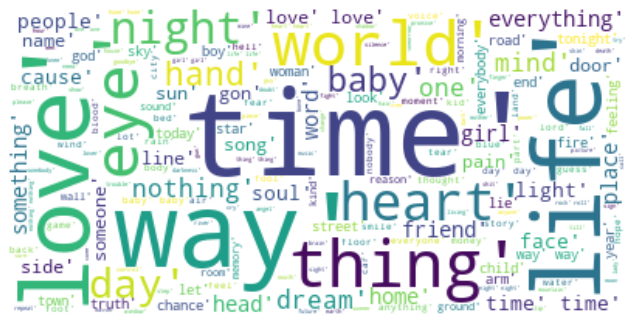

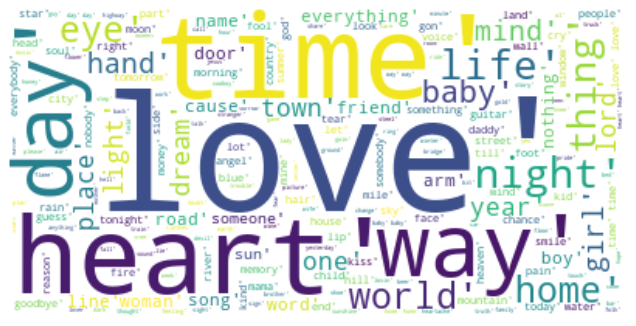

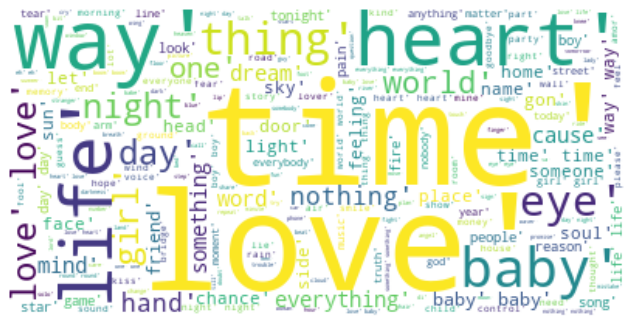

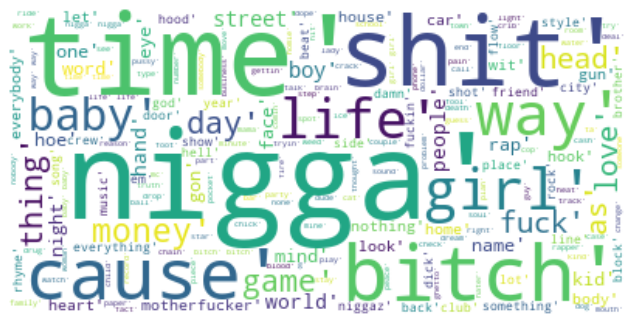

In [19]:
wordcloud_rock = WordCloud(stopwords=stopWords, background_color="white").generate(lyricsr)
wordcloud_country = WordCloud(stopwords=stopWords, background_color="white").generate(lyricsc)
wordcloud_pop = WordCloud(stopwords=stopWords, background_color="white").generate(lyricsp)
wordcloud_hip = WordCloud(stopwords=stopWords, background_color="white").generate(lyricsh)


# Display the generated image:
# the matplotlib way:
figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')

plt.imshow(wordcloud_rock, interpolation='bilinear')
plt.axis("off")
plt.show()

figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plt.imshow(wordcloud_country, interpolation='bilinear')
plt.axis("off")
plt.show()

figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plt.imshow(wordcloud_pop, interpolation='bilinear')
plt.axis("off")
plt.show()

figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plt.imshow(wordcloud_hip, interpolation='bilinear')
plt.axis("off")
plt.show()